In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = ("/kaggle/input/my-clean-dataset/cleaned4_data.csv")
df = pd.read_csv("/kaggle/input/my-clean-dataset/cleaned4_data.csv")




In [2]:
# Convert DateAndTime column to datetime format
df['DateAndTime'] = pd.to_datetime(df['DateAndTime'], errors='coerce')

# Select columns related to joists (Left & Right only)
selected_columns = [col for col in df.columns if any(dir in col for dir in ['N', 'S', 'E', 'W']) 
                    and ('Left' in col or 'Right' in col)]
df_selected = df[['DateAndTime'] + selected_columns]

# Display selected columns
print("Selected Columns:", selected_columns)
df_selected.head()

Selected Columns: ['BS-MJoistLeft', 'BS-MJoistLeft-MC', 'BS-MJoistRight', 'BS-MJoistRight-MC', 'FN-MJoistLeft', 'FN-MJoistLeft-MC', 'FN-MJoistRight', 'FN-MJoistRight-MC', 'FS-MJoistLeft', 'FS-MJoistLeft-MC', 'FS-MJoistRight', 'FS-MJoistRight-MC']


,DateAndTime,BS-MJoistLeft,BS-MJoistLeft-MC,BS-MJoistRight,BS-MJoistRight-MC,FN-MJoistLeft,FN-MJoistLeft-MC,FN-MJoistRight,FN-MJoistRight-MC,FS-MJoistLeft,FS-MJoistLeft-MC,FS-MJoistRight,FS-MJoistRight-MC
0,2012-12-12 12:00:00,309.785672,14.769919,541.948547,13.06738,0.253617,41.172441,2.338302,25.257859,2720.218981,10.871405,723.673405,11.642372
1,2012-12-12 13:00:00,794.900000,14.769919,1171.000000,13.06738,0.253617,41.172441,2.338302,25.257859,2720.218981,10.871405,723.673405,11.642372
2,2012-12-12 14:00:00,746.600000,11.600000,1106.000000,11.20000,0.253617,41.172441,2.338302,25.257859,2720.218981,10.871405,723.673405,11.642372
3,2012-12-12 15:00:00,696.400000,11.700000,1012.000000,11.20000,0.000000,41.172441,0.700000,25.257859,4093.000000,10.871405,717.500000,11.642372
4,2012-12-12 16:00:00,709.100000,11.600000,982.000000,11.30000,0.000000,59.500000,0.700000,28.600000,4132.000000,9.900000,709.100000,11.800000


In [3]:
# Ensure 'DateAndTime' exists and is in datetime format
if 'DateAndTime' in df_selected.columns:
    df_selected['DateAndTime'] = pd.to_datetime(df_selected['DateAndTime'], errors='coerce')

    # Extract time features
    df_selected['Hour'] = df_selected['DateAndTime'].dt.hour
    df_selected['Month'] = df_selected['DateAndTime'].dt.month
    df_selected['DayOfWeek'] = df_selected['DateAndTime'].dt.dayofweek

    # Drop DateAndTime column
    df_selected.drop(columns=['DateAndTime'], inplace=True)
else:
    print("Error: 'DateAndTime' column not found in df_selected")

# Display modified data
print(df_selected.head())

   BS-MJoistLeft  BS-MJoistLeft-MC  BS-MJoistRight  BS-MJoistRight-MC  \
0     309.785672         14.769919      541.948547           13.06738   
1     794.900000         14.769919     1171.000000           13.06738   
2     746.600000         11.600000     1106.000000           11.20000   
3     696.400000         11.700000     1012.000000           11.20000   
4     709.100000         11.600000      982.000000           11.30000   

   FN-MJoistLeft  FN-MJoistLeft-MC  FN-MJoistRight  FN-MJoistRight-MC  \
0       0.253617         41.172441        2.338302          25.257859   
1       0.253617         41.172441        2.338302          25.257859   
2       0.253617         41.172441        2.338302          25.257859   
3       0.000000         41.172441        0.700000          25.257859   
4       0.000000         59.500000        0.700000          28.600000   

   FS-MJoistLeft  FS-MJoistLeft-MC  FS-MJoistRight  FS-MJoistRight-MC  Hour  \
0    2720.218981         10.871405      723

<ipython-input-3-aa53f160957c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DateAndTime'] = pd.to_datetime(df_selected['DateAndTime'], errors='coerce')
<ipython-input-3-aa53f160957c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Hour'] = df_selected['DateAndTime'].dt.hour
<ipython-input-3-aa53f160957c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [4]:
# Fill missing values with column mean and assign it back explicitly
df_selected = df_selected.copy()  # Ensure it's a proper DataFrame, not a view
df_selected.fillna(df_selected.mean(), inplace=True)

# Check if any missing values remain
print(df_selected.isnull().sum())

BS-MJoistLeft        0
BS-MJoistLeft-MC     0
BS-MJoistRight       0
BS-MJoistRight-MC    0
FN-MJoistLeft        0
FN-MJoistLeft-MC     0
FN-MJoistRight       0
FN-MJoistRight-MC    0
FS-MJoistLeft        0
FS-MJoistLeft-MC     0
FS-MJoistRight       0
FS-MJoistRight-MC    0
Hour                 0
Month                0
DayOfWeek            0
dtype: int64


In [5]:
# Define target variable (Modify based on dataset)
target_column = 'BS-MJoistLeft-MC'  # Change to actual target column
X = df_selected.drop(columns=[target_column])
y = df_selected[target_column]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display dataset shapes
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)


Training Features Shape: (15285, 14)
Testing Features Shape: (3822, 14)


In [6]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Performance
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression MAE: 0.3346420488708773
Linear Regression RMSE: 0.43669620396746117
Linear Regression R2 Score: 0.9503676476019456


In [7]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Performance
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 0.0200530015377549
Random Forest RMSE: 0.043118022821771726
Random Forest R2 Score: 0.9995161355644775


In [8]:
# Train Neural Network
nn = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn.fit(X_train_scaled, y_train)

# Predictions
y_pred_nn = nn.predict(X_test_scaled)

# Performance
print("Neural Network MAE:", mean_absolute_error(y_test, y_pred_nn))
print("Neural Network RMSE:", mean_squared_error(y_test, y_pred_nn, squared=False))
print("Neural Network R2 Score:", r2_score(y_test, y_pred_nn))


Neural Network MAE: 0.07369566323222676
Neural Network RMSE: 0.11868039627111565
Neural Network R2 Score: 0.996334240222343


In [9]:
# Define Stacking Model
stacking_model = StackingRegressor(
    estimators=[('lr', lr), ('rf', rf)], final_estimator=nn
)

# Train Stacking Model
stacking_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Performance
print("Stacking Model MAE:", mean_absolute_error(y_test, y_pred_stacking))
print("Stacking Model RMSE:", mean_squared_error(y_test, y_pred_stacking, squared=False))
print("Stacking Model R2 Score:", r2_score(y_test, y_pred_stacking))


Stacking Model MAE: 0.02219121154346427
Stacking Model RMSE: 0.0436588391202246
Stacking Model R2 Score: 0.9995039215132134


In [10]:
models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Neural Network": y_pred_nn,
    "Stacking Model": y_pred_stacking
}

for name, predictions in models.items():
    print(f"🔹 {name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, predictions)}")
    print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False)}")
    print(f"R2 Score: {r2_score(y_test, predictions)}\n")




🔹 Linear Regression Performance:
MAE: 0.3346420488708773
RMSE: 0.43669620396746117
R2 Score: 0.9503676476019456

🔹 Random Forest Performance:
MAE: 0.0200530015377549
RMSE: 0.043118022821771726
R2 Score: 0.9995161355644775

🔹 Neural Network Performance:
MAE: 0.07369566323222676
RMSE: 0.11868039627111565
R2 Score: 0.996334240222343

🔹 Stacking Model Performance:
MAE: 0.02219121154346427
RMSE: 0.0436588391202246
R2 Score: 0.9995039215132134



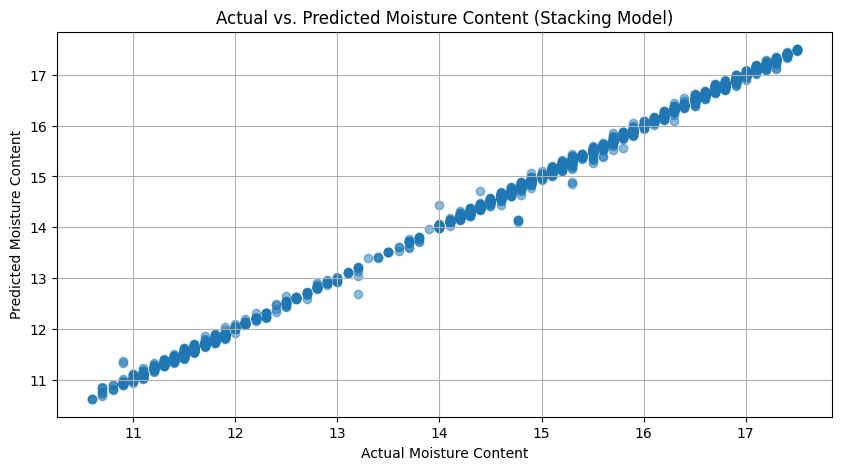

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_stacking, alpha=0.5)
plt.xlabel("Actual Moisture Content")
plt.ylabel("Predicted Moisture Content")
plt.title("Actual vs. Predicted Moisture Content (Stacking Model)")
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae = mean_absolute_error(y_test, y_pred_stacking)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
r2 = r2_score(y_test, y_pred_stacking)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0222
Root Mean Squared Error (RMSE): 0.0437
R² Score: 0.9995


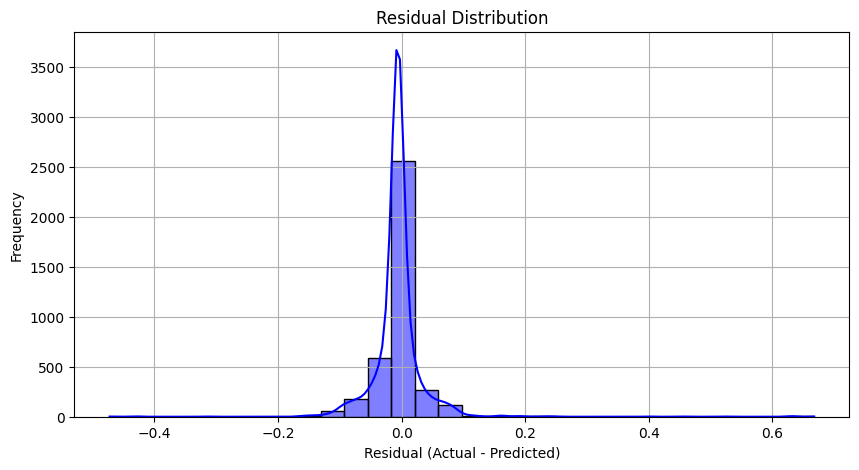

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate residuals
residuals = y_test - y_pred_stacking

# Ensure no infinite or NaN values exist
residuals = residuals.replace([np.inf, -np.inf], np.nan).dropna()

# Plot residual distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid(True)
plt.show()

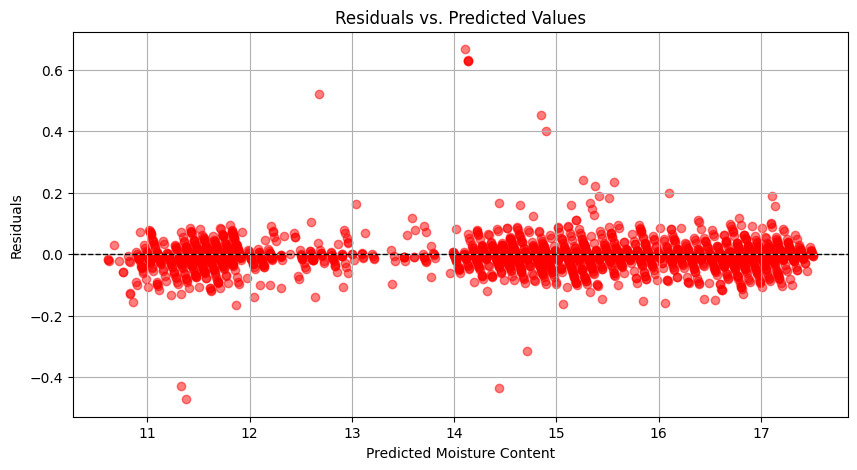

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_stacking, residuals, alpha=0.5, color='red')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel("Predicted Moisture Content")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

Columns in the dataset: Index(['DateAndTime', 'FN-TPocket', 'FN-TCheek', 'FE-TPocket', 'FE-TCheek',
       'FS-TPocket', 'Tint1', 'Tint2', 'BN1-MCheek', 'BN1-MCheek-MC',
       ...
       'BE1-TPocket', 'BE1-TCheek', 'BE2-TPocket', 'BE2-TCheek', 'BS-TPocket',
       'BS-TCheek', 'BW1-TPocket', 'BW1-TCheek', 'BW2-TPocket', 'BW2-TCheek'],
      dtype='object', length=131)
Number of features after imputation: 129


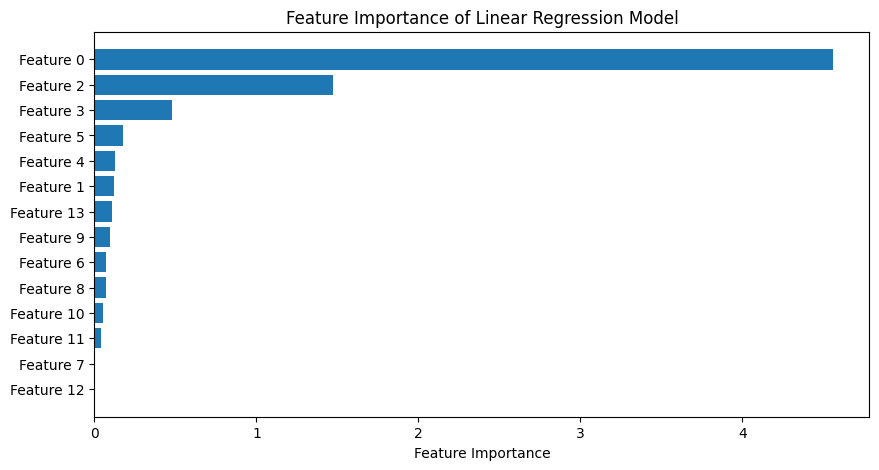

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Load the dataset directly from the given file path
file_path = "/kaggle/input/my-clean-dataset/cleaned4_data.csv"  # Your provided file path

# Load the dataset into a DataFrame
X_train = pd.read_csv(file_path)

# Print the column names to check for the target column
print("Columns in the dataset:", X_train.columns)

# Automatically use the last column as the target
target_column = X_train.columns[-1]

# Extract target and features
y_train = X_train[target_column]
X_train = X_train.drop(columns=[target_column])  # Drop the target column from features

# Convert to numeric values (if needed) and check for NaN values
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Handling missing values (imputation)
imputer = SimpleImputer(strategy='median')  # You can also use 'mean' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)

# Impute the target column if needed
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Ensure the number of features matches the model's expected input
print("Number of features after imputation:", X_train_imputed.shape[1])

# If your model expects 14 features, but your data has more, you need to select only 14 features
# For simplicity, let's assume you want to use the first 14 features:
if X_train_imputed.shape[1] != 14:
    X_train_imputed = X_train_imputed[:, :14]  # Select the first 14 features

# Check if there are any remaining NaN values
if np.any(np.isnan(X_train_imputed)) or np.any(np.isnan(y_train_imputed)):
    print("Data still contains NaN values. Please handle them before proceeding.")
else:
    # Initialize and train the model (LinearRegression in this case)
    model = LinearRegression()
    model.fit(X_train_imputed, y_train_imputed)

    # Perform permutation importance
    result = permutation_importance(model, X_train_imputed, y_train_imputed, n_repeats=5, random_state=42)

    # Get the feature importances
    importances = result.importances_mean
    feature_names = [f"Feature {i}" for i in range(X_train_imputed.shape[1])]

    # Sort and visualize
    sorted_idx = np.argsort(importances)

    # Plotting the feature importances
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance of Linear Regression Model")
    plt.show()


In [16]:
import joblib

joblib.dump(stacking_model, "stacking_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [17]:
stacking_model = joblib.load("stacking_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
